<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

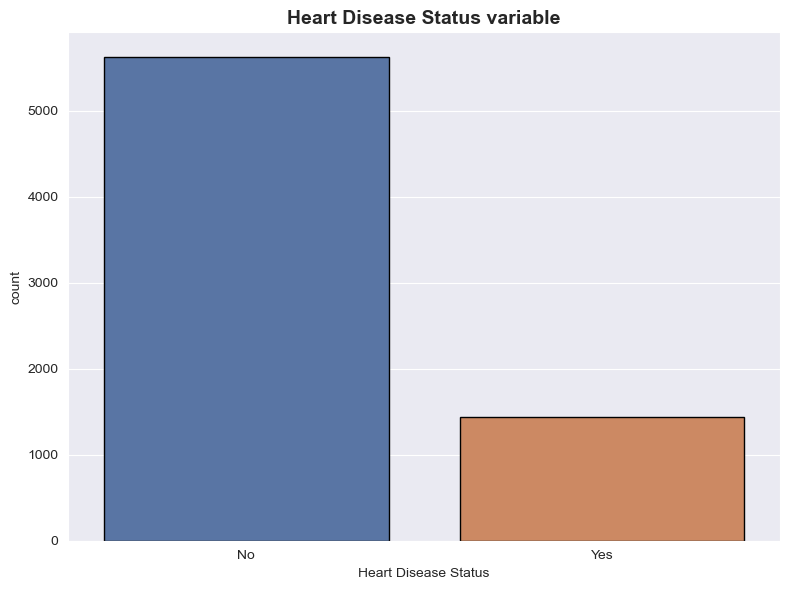

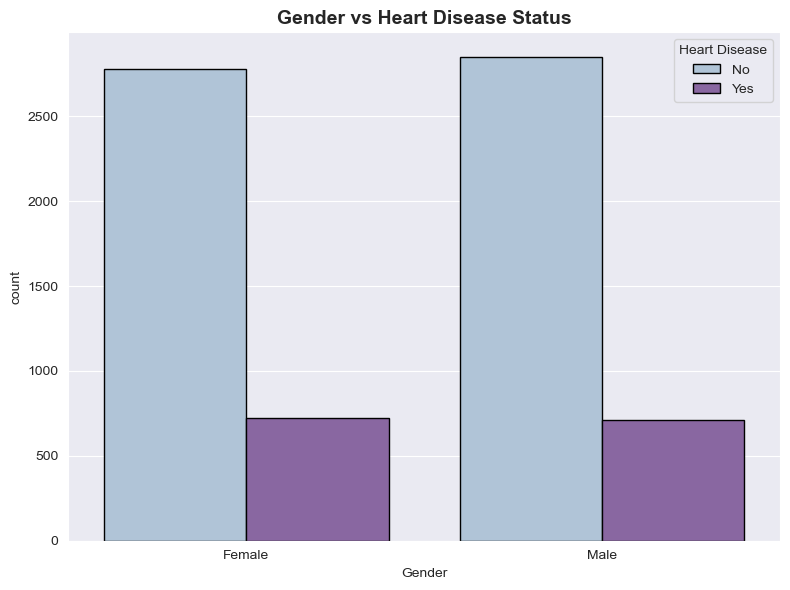

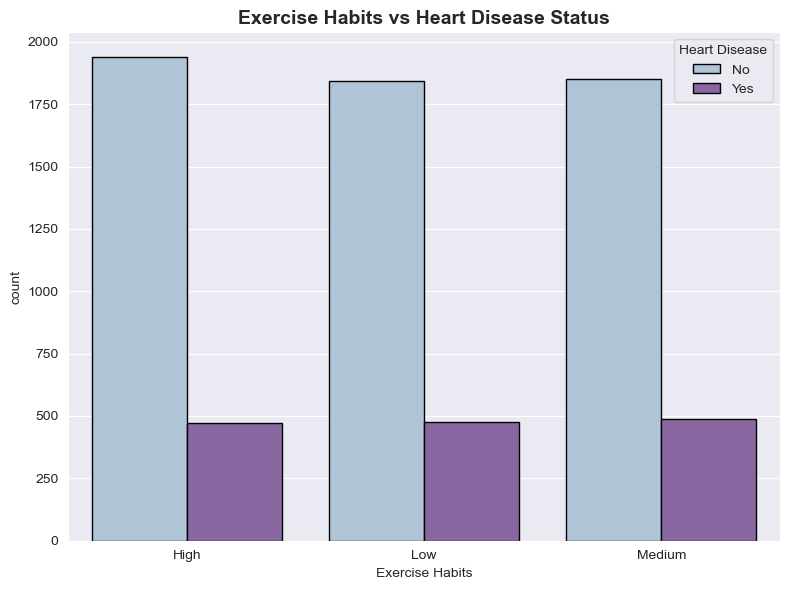

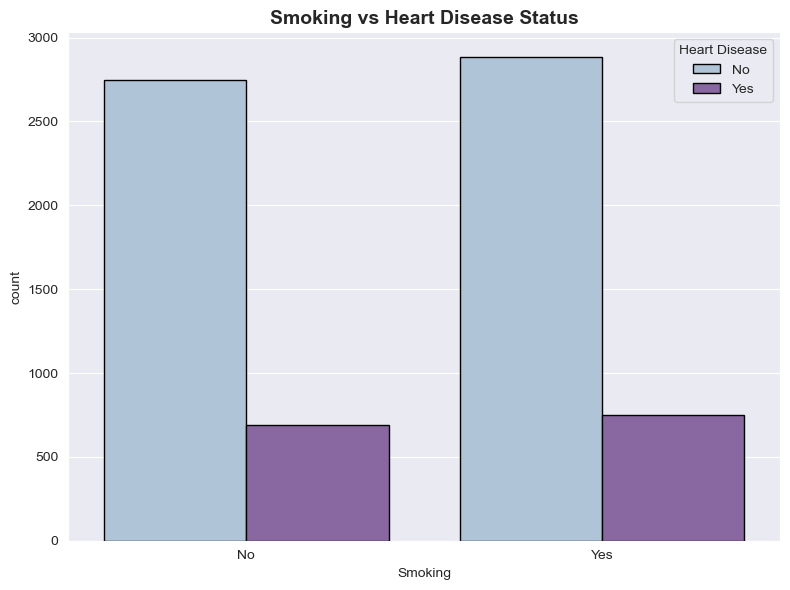

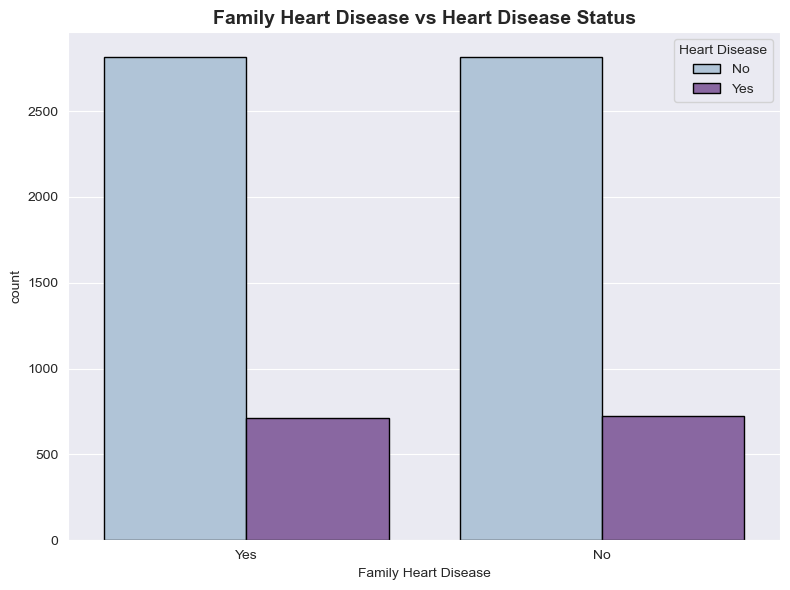

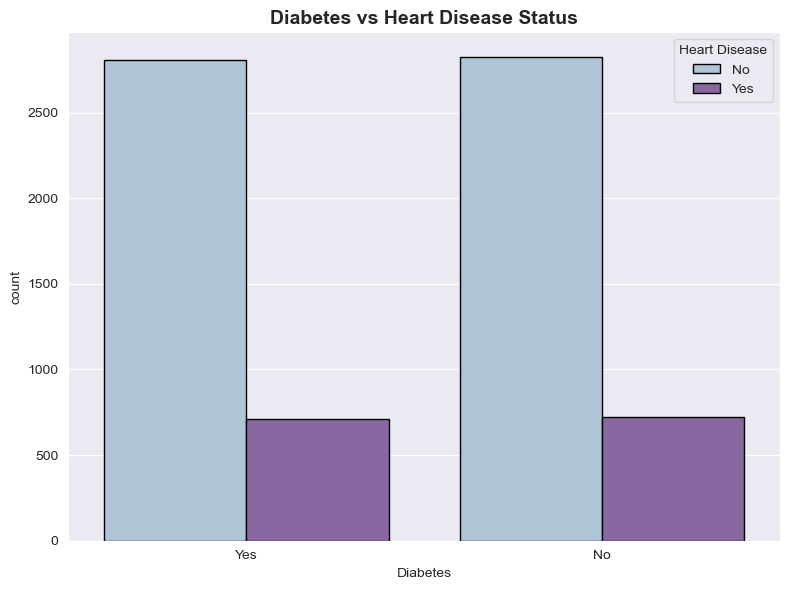

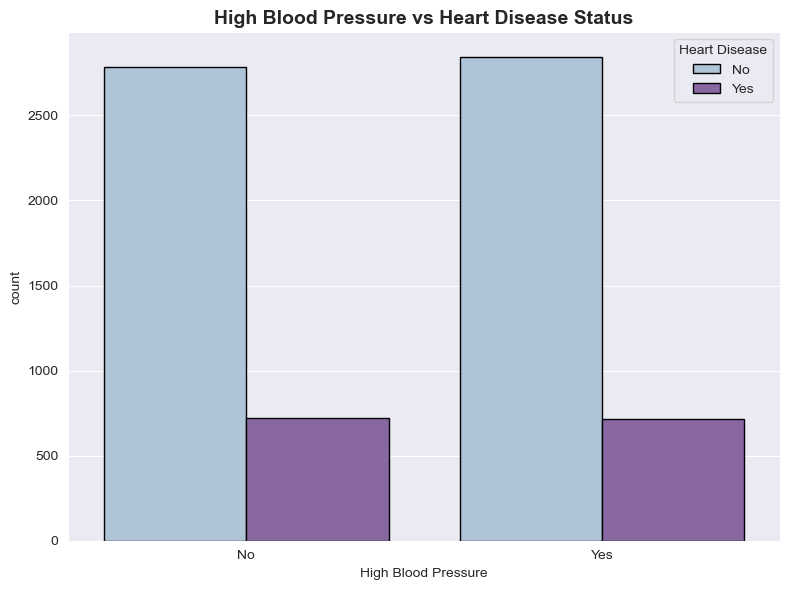

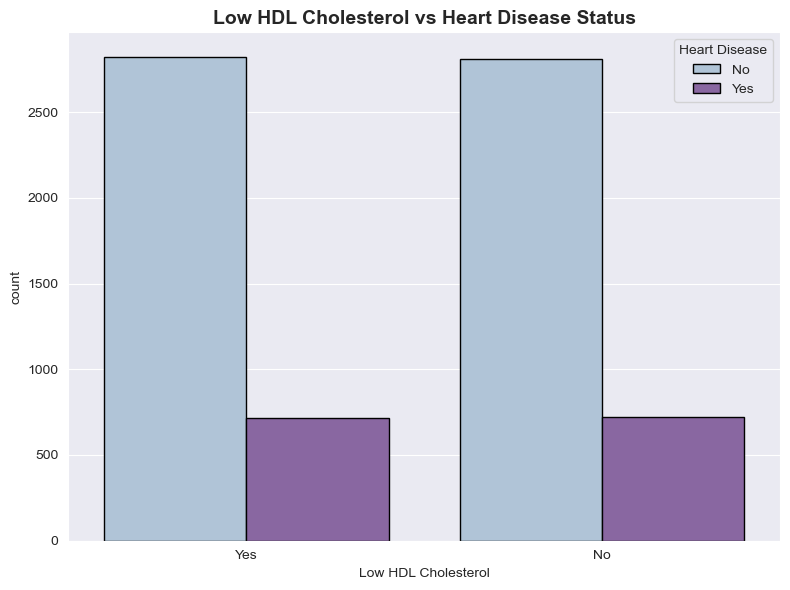

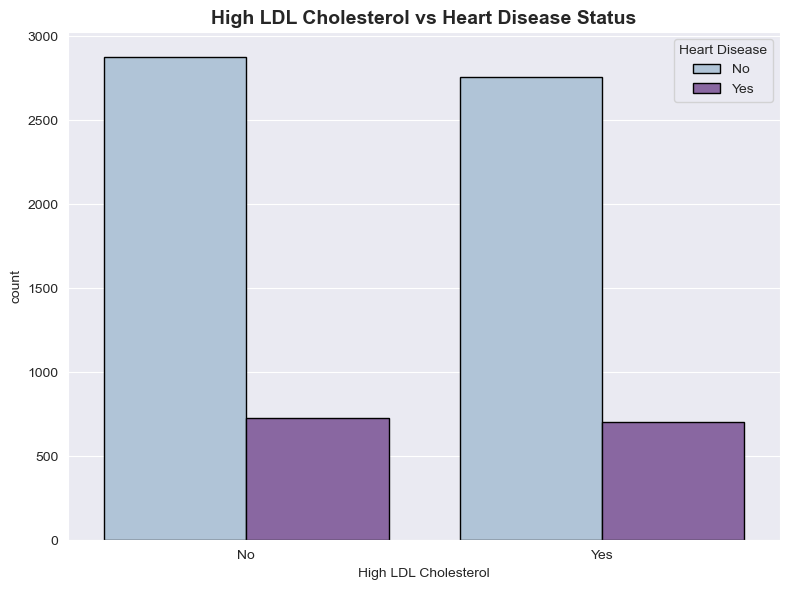

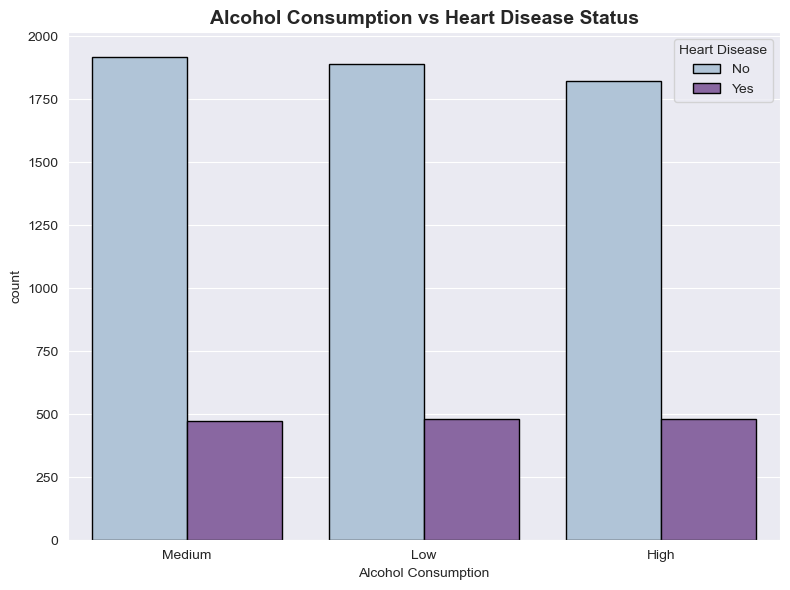

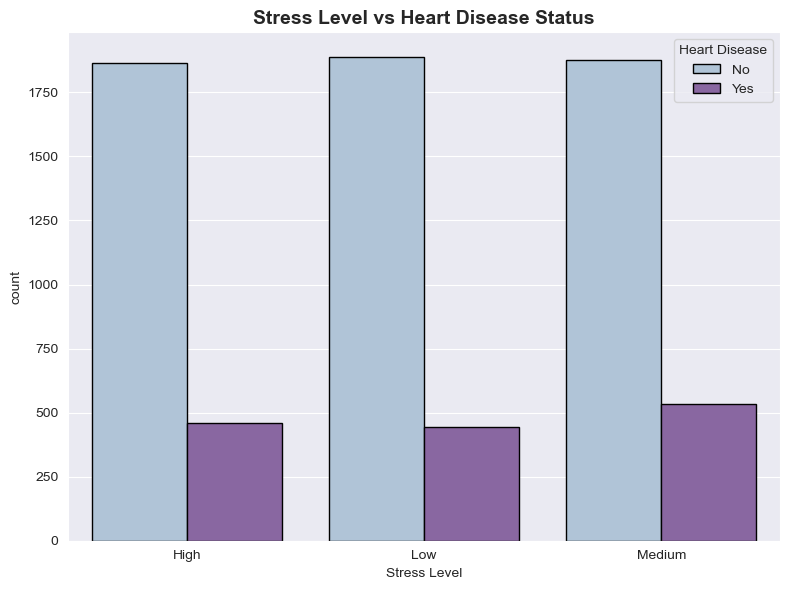

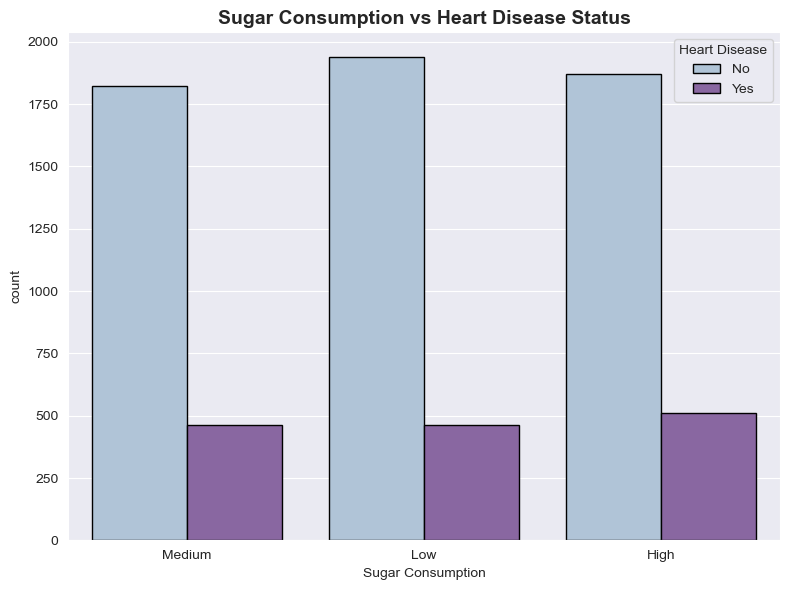

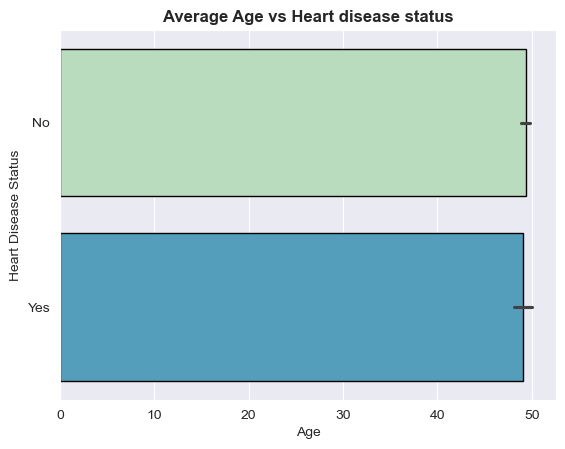

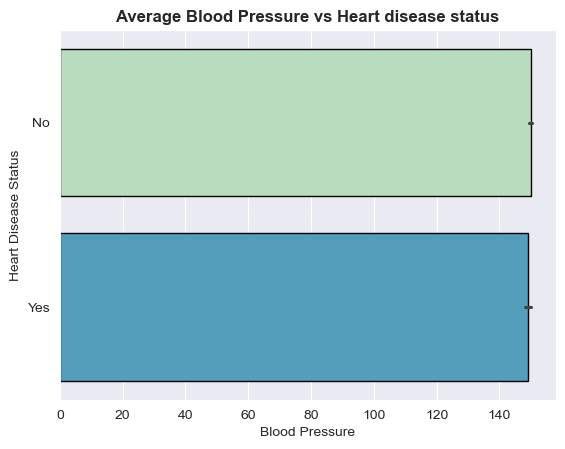

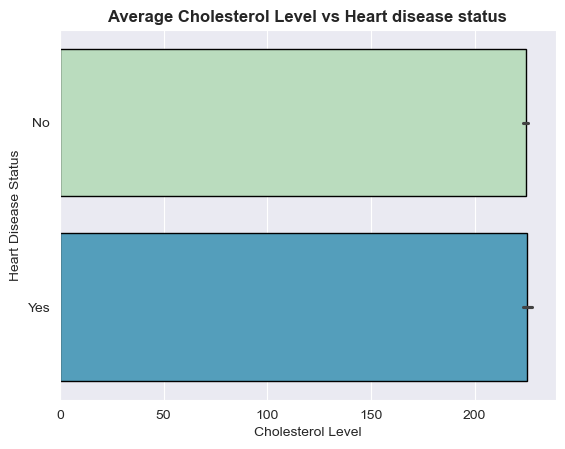

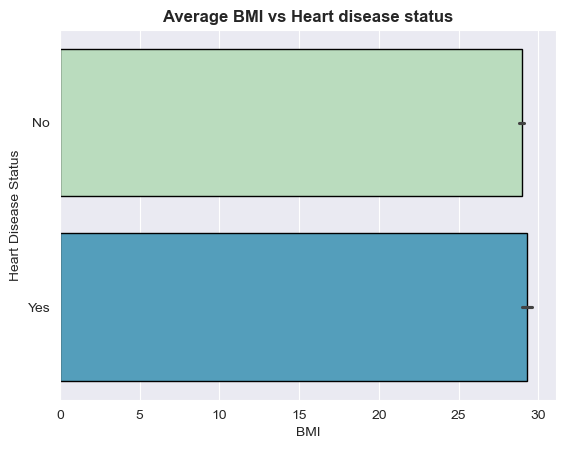

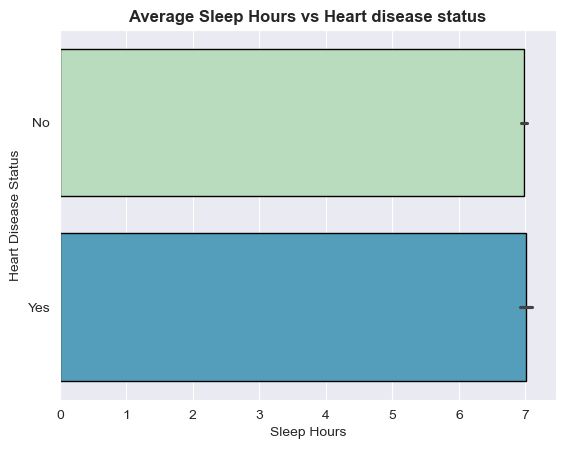

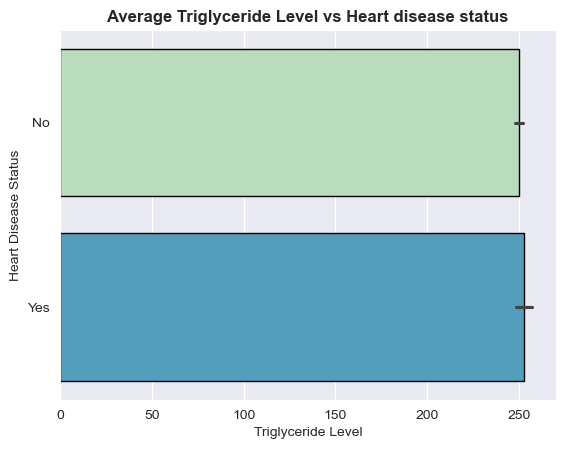

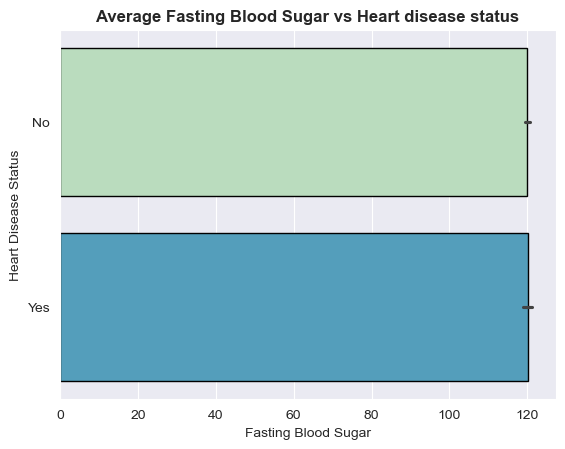

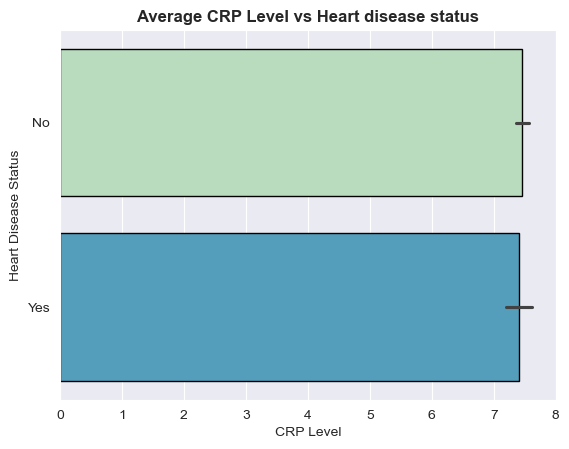

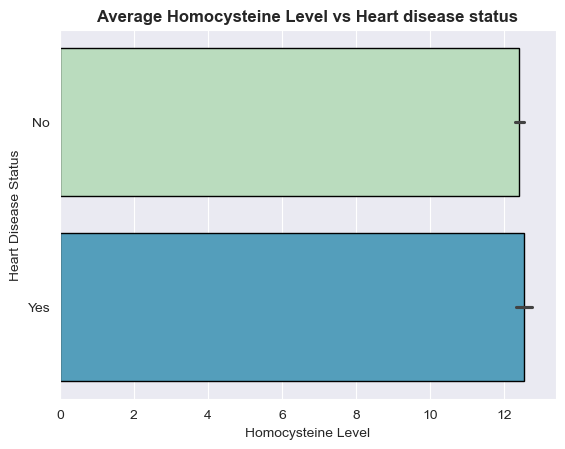

In [1]:
# Load EDA notebook
%run Heart_disease_EDA.ipynb

## Import libraries

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

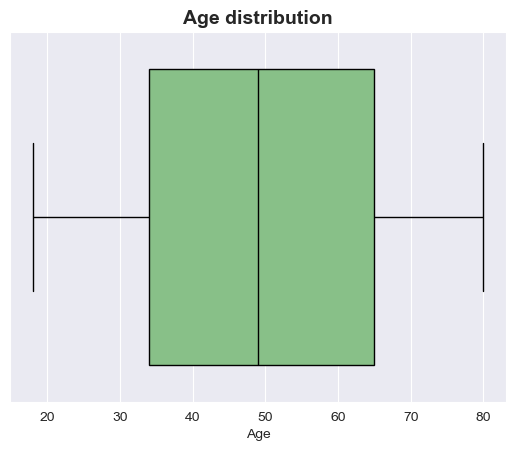

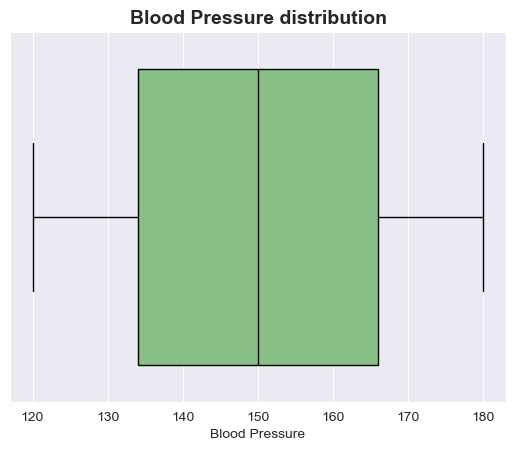

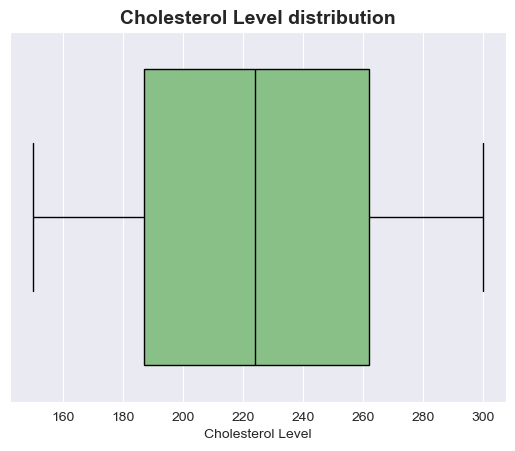

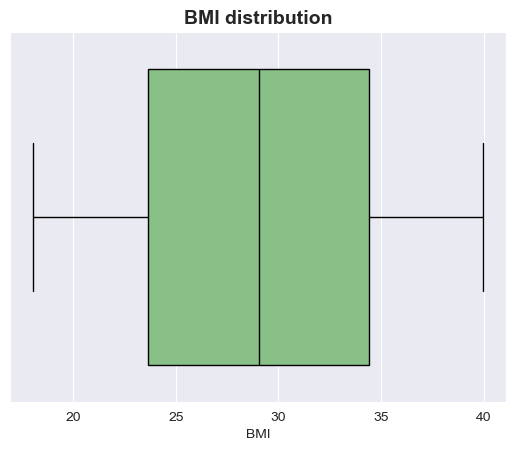

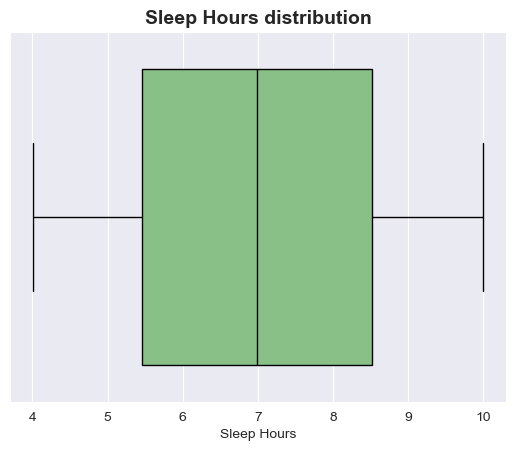

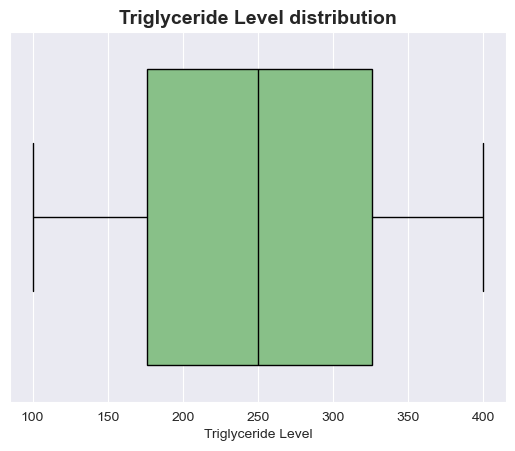

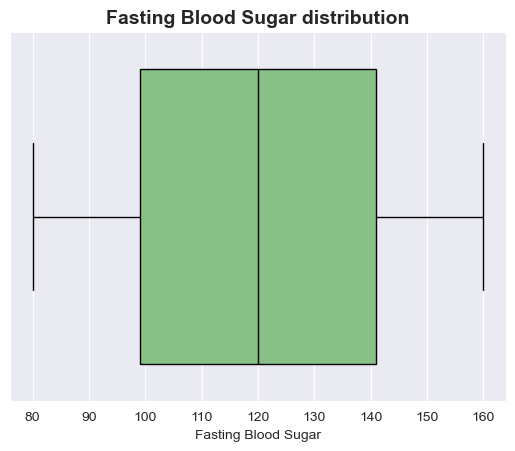

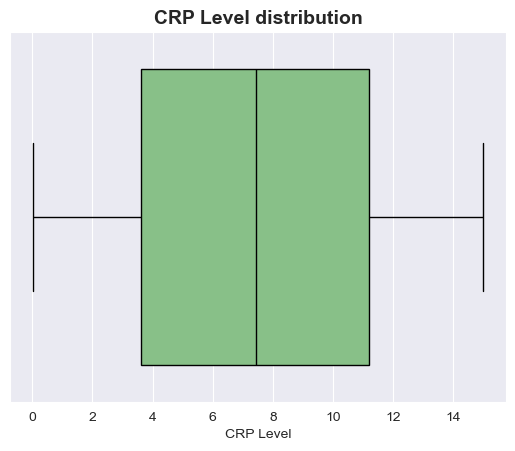

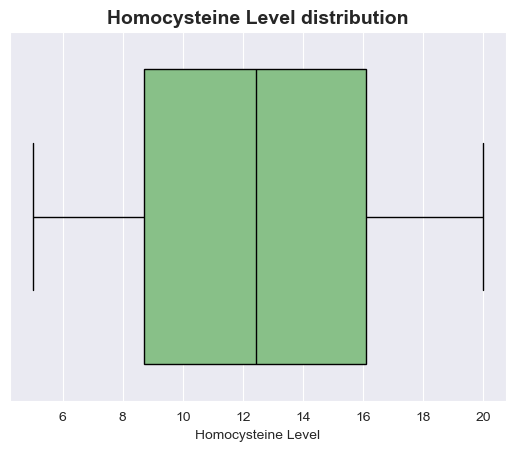

In [3]:
# Outlier detection of numeric features
for i in numeric_var:
    sns.set_style('darkgrid')
    sns.boxplot(data = df, x = i, linecolor = 'black', palette = 'Accent')
    plt.title(f'{i} distribution', fontsize = 14, fontweight = 'bold')
    plt.show()   

In [18]:
# Copy original dataframe 
df_prep = df.copy(deep = True)
df_prep.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No


In [4]:
object_var.head()

,Gender,Exercise Habits,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sugar Consumption
1,Female,High,No,Yes,Yes,No,Yes,No,Medium,High,Medium
2,Male,Low,No,No,No,No,Yes,Yes,Low,Low,Low
3,Female,High,Yes,Yes,No,Yes,No,Yes,Low,High,High
4,Male,Low,Yes,Yes,Yes,Yes,No,No,Low,High,High
5,Male,Low,Yes,No,No,No,No,No,Low,Medium,Low


In [5]:
# Categorical values need to be encoded.
binary_var = object_var.drop(['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption'], 
                             axis = 1)
binary_var.head()

,Gender,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol
1,Female,No,Yes,Yes,No,Yes,No
2,Male,No,No,No,No,Yes,Yes
3,Female,Yes,Yes,No,Yes,No,Yes
4,Male,Yes,Yes,Yes,Yes,No,No
5,Male,Yes,No,No,No,No,No


In [6]:
ordinal_var = object_var.drop(binary_var, axis = 1)
ordinal_var.head()

,Exercise Habits,Alcohol Consumption,Stress Level,Sugar Consumption
1,High,Medium,High,Medium
2,Low,Low,Low,Low
3,High,Low,High,High
4,Low,Low,High,High
5,Low,Low,Medium,Low


In [41]:
# OneHotEncoder for binary var
ohe = OneHotEncoder(drop = 'first')
enc_ohe = ohe.fit_transform(binary_var).toarray()
enc_labels = ohe.get_feature_names_out()

# Ordinal encoder for ordinal var
enc = OrdinalEncoder()
enc_ord = enc.fit_transform(ordinal_var)
ord_labels = enc.get_feature_names_out()

# Convert encoded data to dataframe
ohe_df = pd.DataFrame(data = enc_ohe, columns = enc_labels, index = df_prep.index)
enc_df = pd.DataFrame(data = enc_ord, columns = ord_labels, index = df_prep.index)

# Drop original columns & create new dataframe for modelling
df_1 = df_prep.drop(columns = binary_var + ordinal_var)
df_model = pd.concat(objs = [df_1, ohe_df, enc_df], axis = 1)

# Change the target variable to numeric
df_model['Heart Disease Status'] = df_model['Heart Disease Status'].replace({'Yes': 1, 'No': 0})
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7067 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7067 non-null   float64
 1   Blood Pressure            7067 non-null   float64
 2   Cholesterol Level         7067 non-null   float64
 3   BMI                       7067 non-null   float64
 4   Sleep Hours               7067 non-null   float64
 5   Triglyceride Level        7067 non-null   float64
 6   Fasting Blood Sugar       7067 non-null   float64
 7   CRP Level                 7067 non-null   float64
 8   Homocysteine Level        7067 non-null   float64
 9   Heart Disease Status      7067 non-null   int64  
 10  Gender_Male               7067 non-null   float64
 11  Smoking_Yes               7067 non-null   float64
 12  Family Heart Disease_Yes  7067 non-null   float64
 13  Diabetes_Yes              7067 non-null   float64
 14  High Blood Pr